### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
%tensorflow_version 2.x
import tensorflow as tf 
print (tf.__version__)

TensorFlow 2.x selected.
2.1.0


### Collect Data

In [2]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [4]:
import numpy as np
print ('shape of trainX',trainX.shape)
print ('shape of testX',testX.shape)
print ('shape of trainY',trainY.shape)
print ('shape of testY',testY.shape)
print ('number of unique entries in lable column ',np.unique(testY, axis=0))

shape of trainX (60000, 28, 28)
shape of testX (10000, 28, 28)
shape of trainY (60000,)
shape of testY (10000,)
number of unique entries in lable column  [0 1 2 3 4 5 6 7 8 9]


In [5]:
# checking few lables 
print(testY[0:5])
lables = trainY

[9 2 1 1 6]


In [6]:
print ('data type of trainX is ',trainX.dtype)
print ('data type of testX is ',testX.dtype)
print ('data type of trainY is ',trainY.dtype)
print ('data type of testY is ',testY.dtype)

data type of trainX is  uint8
data type of testX is  uint8
data type of trainY is  uint8
data type of testY is  uint8


In [0]:
# we need our data to present in as float32
# converting uint8 to float32
trainX =np.array(trainX).astype('float32')
testX = np.array(testX).astype('float32')
trainY =np.array(trainY).astype('float32')
testY = np.array(testY).astype('float32')

In [8]:
print ('data type of trainX is ',trainX.dtype)
print ('data type of testX is ',testX.dtype)
print ('data type of trainY is',trainY.dtype)
print ('data type of testY is ',testY.dtype)

data type of trainX is  float32
data type of testX is  float32
data type of trainY is float32
data type of testY is  float32


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
# converterting catagorical variable of test set into one hot encoding to make use of softmax 
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [0]:
# converterting catagorical variable of train set into one hot encoding
trainY = tf.keras.utils.to_categorical(trainY,num_classes=10)

In [11]:
# Checking shape and first 5 example of train set
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

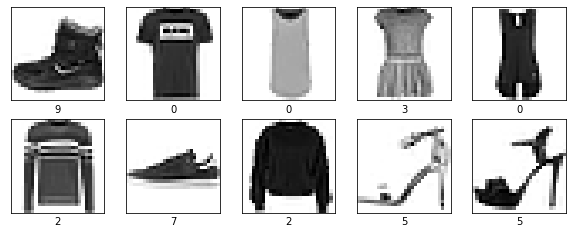

In [12]:
#Plot first 10 images in the triaining set and their labels
import matplotlib.pyplot as plt
# to Print plots in jupyter notebook 
%matplotlib inline 
plt.figure(figsize=(10,10)) # figure size 
for i in range(10): # looping for first 10 element of training set
    plt.subplot(5,5,i+1) # creating sub plot for  ploting figure 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary) # Ploting binry figures 
    plt.xlabel(lables[i]) # giving Lables to plot images 
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential() # Instantiating keras sequential models from keras 

# First layer (input layer) of  28*28 = 784 after flattening the image of 28 * 28 picxels
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
# Final layer with activation function as softmax and 10 neurons 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

# Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# To visualize performance of traing and testing via server by using tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='log_dir_1')

### Execute the model using model.fit()

In [16]:
# fiting our model with 10 epochs 
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10,callbacks=[tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 57us/sample - loss: 6101.4648 - accuracy: 0.7396 - val_loss: 11314.8742 - val_accuracy: 0.7096
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 4877.0309 - accuracy: 0.7774 - val_loss: 4737.6207 - val_accuracy: 0.7976
Epoch 3/10
60000/60000 [==============================] - 3s 55us/sample - loss: 4700.8658 - accuracy: 0.7859 - val_loss: 3470.2084 - val_accuracy: 0.8066
Epoch 4/10
60000/60000 [==============================] - 3s 55us/sample - loss: 4615.8329 - accuracy: 0.7906 - val_loss: 5868.0137 - val_accuracy: 0.7542
Epoch 5/10
60000/60000 [==============================] - 3s 56us/sample - loss: 4400.2570 - accuracy: 0.7945 - val_loss: 3776.7541 - val_accuracy: 0.7917
Epoch 6/10
60000/60000 [==============================] - 3s 58us/sample - loss: 4419.0987 - accuracy: 0.7944 - val_loss: 3626.0978 - val_accuracy: 0.8081
Epoch 7/10
60000/60

In [17]:
# serialize model to JSON
model_json = model.to_json() 
with open("model.json", "w") as json_file: # 
    json_file.write(model_json) # saving our model into to json file format 
# Json file formate can be used to again load our model file to test our model across server 
# serialize weights to HDF5
model.save_weights("model.h5") # saving our model into to HdF.5 file format
# HDF.5 file formate can be used to again load our model file to test our model
print("Saved model to disk")

Saved model to disk


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
# Initialize Sequential model
model_batch_norm = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model_batch_norm.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model_batch_norm.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model_batch_norm.add(tf.keras.layers.Dense(10, activation='softmax'))



# Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

# Compile the model
model_batch_norm.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# To visualize performance of traing and testing via server by using tensorboard
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='log_dir_2')

### Execute the model

In [23]:
# fiting our model with 30 epochs along with batch normalization 
model_batch_norm.fit(trainX, trainY, validation_data=(testX, testY), epochs=30,batch_size = 32 ,callbacks=[tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 74us/sample - loss: 0.5470 - accuracy: 0.8134 - val_loss: 0.5031 - val_accuracy: 0.8290
Epoch 2/30
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4866 - accuracy: 0.8321 - val_loss: 0.4984 - val_accuracy: 0.8340
Epoch 3/30
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4691 - accuracy: 0.8373 - val_loss: 0.4967 - val_accuracy: 0.8349
Epoch 4/30
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4631 - accuracy: 0.8404 - val_loss: 0.4854 - val_accuracy: 0.8352
Epoch 5/30
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4564 - accuracy: 0.8428 - val_loss: 0.4854 - val_accuracy: 0.8380
Epoch 6/30
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4523 - accuracy: 0.8432 - val_loss: 0.5206 - val_accuracy: 0.8328
Epoch 7/30
60000/60000 [==============================] 

In [24]:
# serialize model to JSON
model_json = model_batch_norm.to_json()
with open("model_batch_norm.json", "w") as json_file:# saving our model into to json file format 
# Json file formate can be used to again load our model file to test our model across server
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_batch_norm.h5") # saving our model into to HdF.5 file format
# HDF.5 file formate can be used to again load our model file to test our mode
print("Saved model to disk")

Saved model to disk


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
# Initialize Sequential model
model_batch_norm_coustom_learning  = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model_batch_norm_coustom_learning.add(tf.keras.layers.Reshape((784,),input_shape=(28,28)))

# Normalize the data
model_batch_norm_coustom_learning.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model_batch_norm_coustom_learning.add(tf.keras.layers.Dense(10, activation='softmax'))


# Create optimizer with non-default learning rate 
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

# Compile the model
model_batch_norm_coustom_learning.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# To visualize performance of traing and testing via server by using tensorboard
tb = tf.keras.callbacks.TensorBoard(log_dir='log_dir_3')

In [29]:
# fiting our model with 5 epochs along with batch normalization and non-default learning rate 
model_batch_norm_coustom_learning.fit(trainX, trainY, validation_data=(testX, testY), epochs=5,batch_size = 32 ,callbacks=[tb])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.9278 - accuracy: 0.6846 - val_loss: 0.6845 - val_accuracy: 0.7705
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.6367 - accuracy: 0.7815 - val_loss: 0.6016 - val_accuracy: 0.7944
Epoch 3/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.5828 - accuracy: 0.8001 - val_loss: 0.5701 - val_accuracy: 0.8037
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5551 - accuracy: 0.8092 - val_loss: 0.5495 - val_accuracy: 0.8096
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5366 - accuracy: 0.8152 - val_loss: 0.5402 - val_accuracy: 0.8171


In [30]:
# serialize model to JSON
model_json = model_batch_norm_coustom_learning.to_json()
with open("model_batch_norm_coustom_learning.json", "w") as json_file:
    json_file.write(model_json) # saving our model into to json file format 
# Json file formate can be used to again load our model file to test our model across server
# serialize weights to HDF5
model.save_weights("model_batch_norm_coustom_learning.h5") # saving our model into to HdF.5 file format
# HDF.5 file formate can be used to again load our model file to test our mode
print("Saved model to disk")

Saved model to disk


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
# Initialize Sequential model
model_batch_norm_layer = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model_batch_norm_layer.add(tf.keras.layers.Reshape((784,),input_shape=(28,28)))

# Normalize the data
model_batch_norm_layer.add(tf.keras.layers.BatchNormalization())


# Add Dense Layer which provides 100 Outputs after applying relu
model_batch_norm_layer.add(tf.keras.layers.Dense(100, activation='relu'))

# Add Dense Layer which provides 100 Outputs after applying softmax
model_batch_norm_layer.add(tf.keras.layers.Dense(100, activation='relu'))


# Add Dense Layer which provides 10 Outputs after applying softmax
model_batch_norm_layer.add(tf.keras.layers.Dense(10, activation='softmax'))

# Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

# Compile the model
model_batch_norm_layer.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [35]:
# Checking summary, total number of parameters (trainable and non trainable) which are present in our model
model_batch_norm_layer.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 784)               3136      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [0]:
# To visualize performance of traing and testing via server by using tensorboard
tb3 = tf.keras.callbacks.TensorBoard(log_dir = 'log_dir_4')

In [37]:
# fiting our model with 5 epochs along with batch normalization and non-default learning rate 
model_batch_norm_layer.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size = 32 , callbacks=[tb3])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.5015 - accuracy: 0.8214 - val_loss: 0.4073 - val_accuracy: 0.8543
Epoch 2/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3802 - accuracy: 0.8619 - val_loss: 0.3924 - val_accuracy: 0.8644
Epoch 3/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3411 - accuracy: 0.8749 - val_loss: 0.3611 - val_accuracy: 0.8701
Epoch 4/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3161 - accuracy: 0.8832 - val_loss: 0.3683 - val_accuracy: 0.8699
Epoch 5/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2980 - accuracy: 0.8895 - val_loss: 0.3592 - val_accuracy: 0.8745
Epoch 6/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2840 - accuracy: 0.8943 - val_loss: 0.3513 - val_accuracy: 0.8813
Epoch 7/10
60000/60000 [==========================

In [0]:
# serialize model to JSON
model_json = model_batch_norm_layer.to_json()
with open("model_batch_norm_layer.json", "w") as json_file:# saving our model into to json file format 
# Json file formate can be used to again load our model file to test our model across server
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_batch_norm_layer.h5") # saving our model into to HdF.5 file format
# HDF.5 file formate can be used to again load our model file to test our mode
print("Saved model to disk")

Saved model to disk
